In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Information

In [68]:
df =pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- The dataset has to many features with text data and probably categorial features
- Total Charges is a numerical feature but are stored in string datatype. First, we will convert this column into float

In [71]:
df[(pd.to_numeric(df['TotalCharges'],errors='coerce')).isnull()]
df=df[~(pd.to_numeric(df['TotalCharges'],errors='coerce')).isnull()]

In [72]:
df.drop(columns = ['customerID'], inplace = True)

<ipython-input-72-97bcc1c43363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['customerID'], inplace = True)


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  :  [2504 1465  156 ... 2993 2659 5406]  =  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn  :  [0 1]  =  ['

In [74]:
df1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,3261.890216,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,1885.766048,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3253.500000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,4903.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6529.000000,1.000000


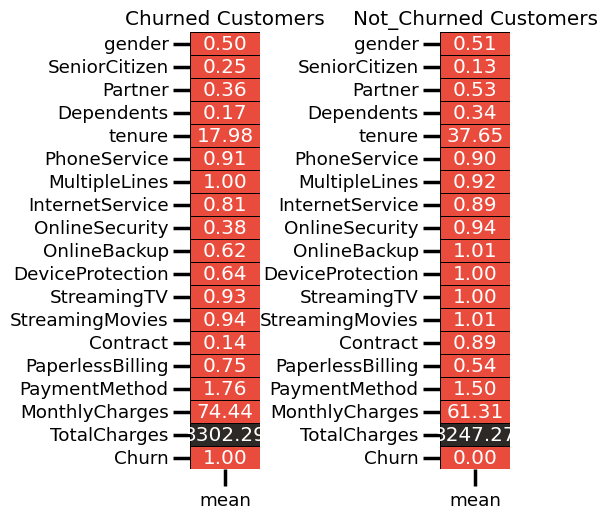

In [75]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

- Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.
- Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
- Churned customer's Contract value is much smaller than those of not-churned customers.
- Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
- Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.

  =>From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.

# Exploring the Data

In [84]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
  if len(df[i].unique()) > 6:
    numerical_features.append(i)
  else:
    categorical_features.append(i)

print('Categorical Features: ',categorical_features)
print('Numerical Features: ',numerical_features)

Categorical Features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features:  ['tenure', 'MonthlyCharges', 'TotalCharges']


<ipython-input-85-90f069ef52ae>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn',data = df,palette = colors,edgecolor = 'black')
<ipython-input-85-90f069ef52ae>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])


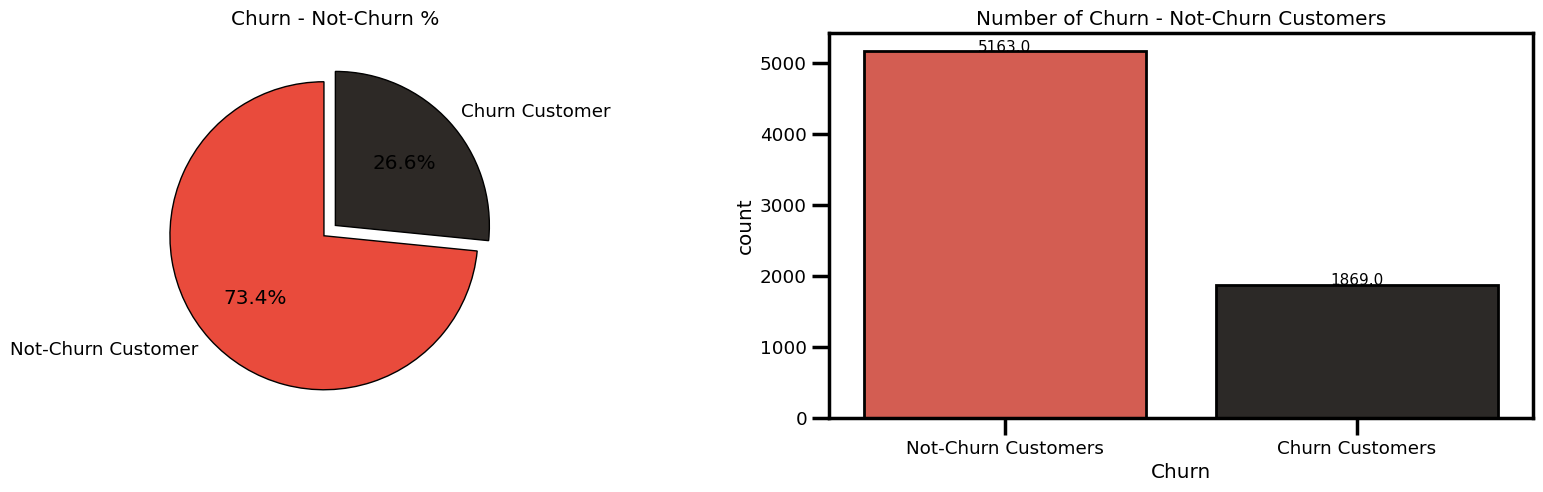

In [85]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot(x='Churn',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])

plt.title('Number of Churn - Not-Churn Customers');
plt.show()

- The data set is imbalanced when the churn to non-churn ratio is 1:3
- Due to this, predictions will be biased towards Not-Churn customers

In [86]:
categorical_features.remove('Churn')

In [87]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

Group 1: Customer Information

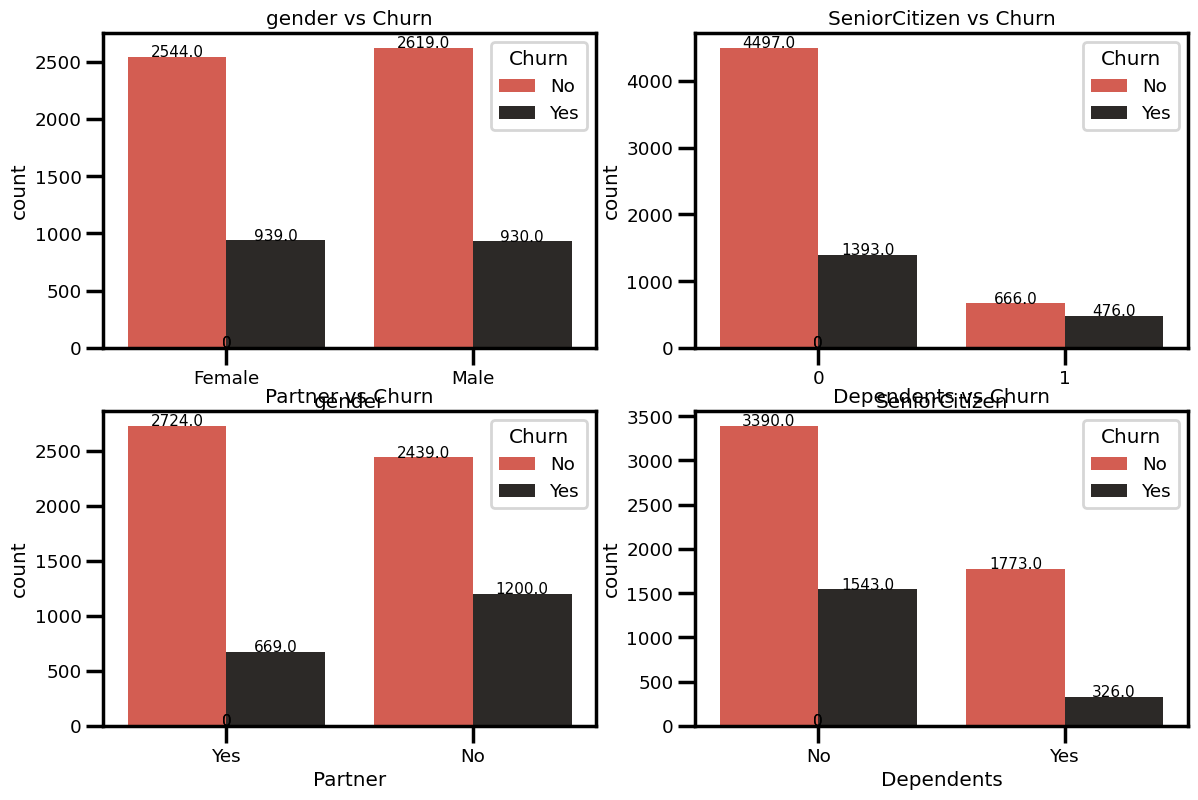

In [88]:
fig = plt.subplots(nrows=2,ncols=2,figsize=(14,9))
for i in range(len(l1)):
  plt.subplot(2,2,i+1)
  ax = sns.countplot(x=l1[i],data=df,hue='Churn',palette = colors)
  for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
  title = l1[i] + ' vs Churn'
  plt.title(title);

- Customer churing for male & female customers is very similar to each other
- Number of SeniorCitizen customers is pretty low
- Customers who are housing with a Partner churned less as compared to those not living with a Partner.
- Similary, churning is high for the customers that don't have Dependents with them!

Group 2: Services Subscribed by the Customer

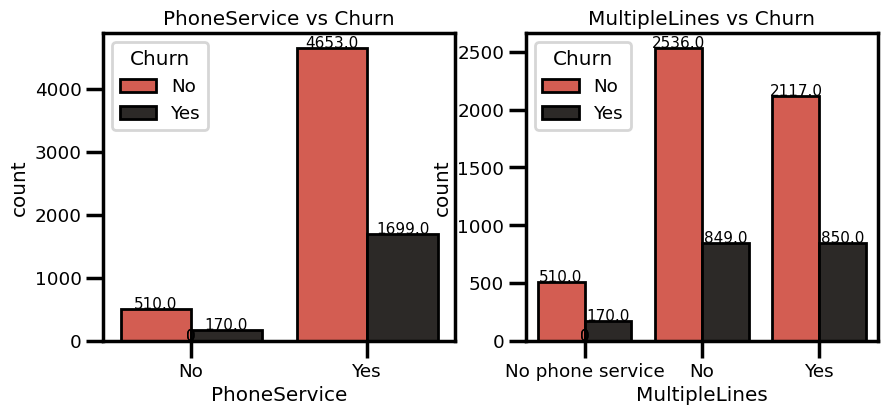

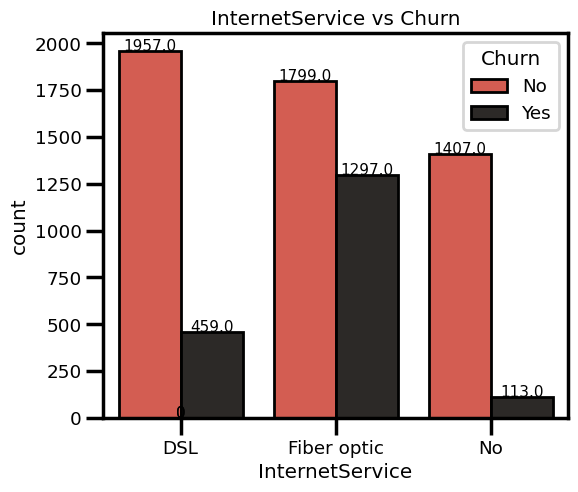

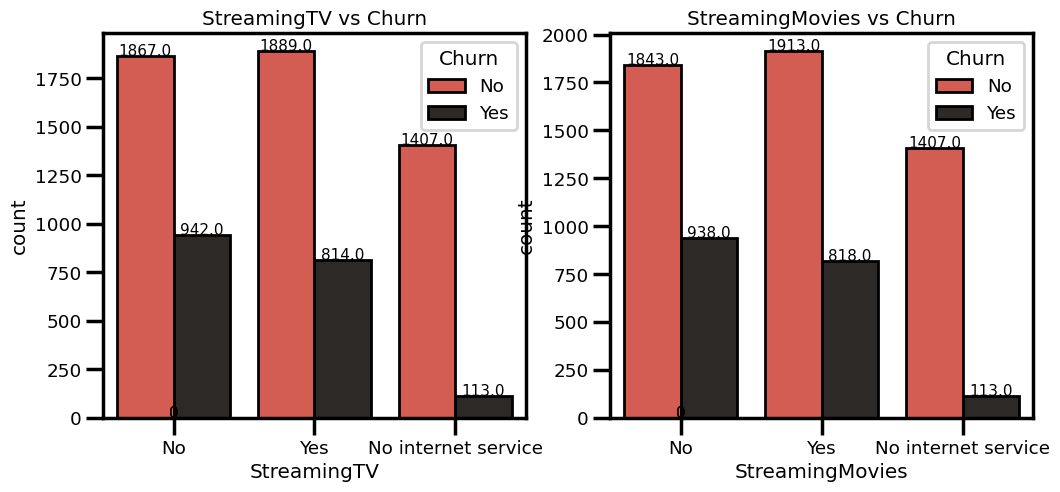

In [89]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,4))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 3],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

- For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.
- A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
- StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

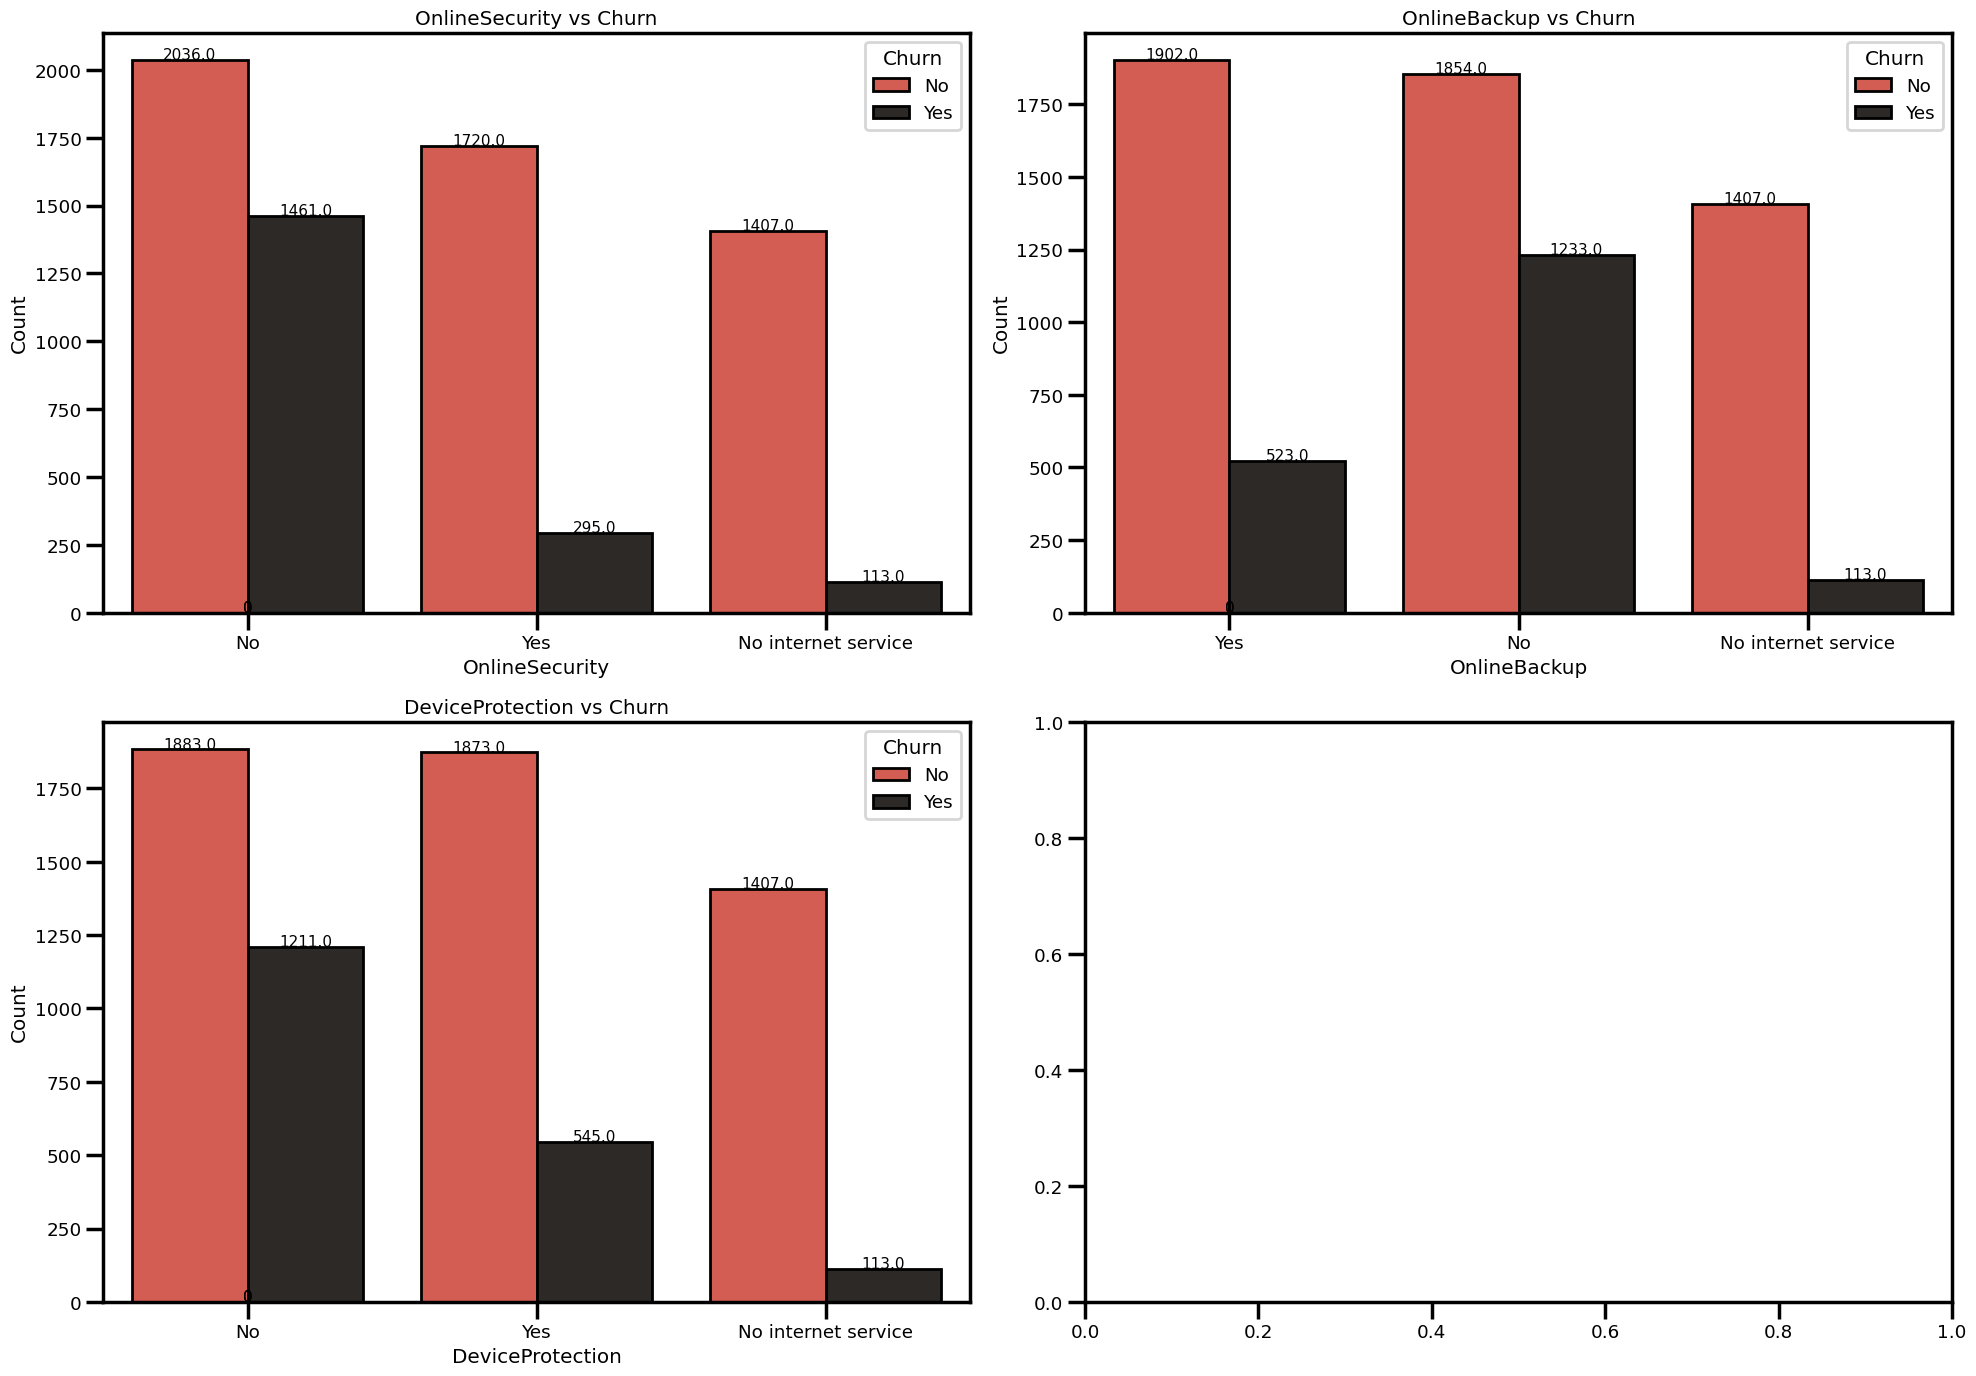

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i in range(len(l2[-3:])):
    ax = axes[i // 2, i % 2]
    sns.countplot(x=l2[-3 + i], data=df, hue="Churn", palette=colors, edgecolor='black', ax=ax)
    ax.set_title(l2[-3 + i] + ' vs Churn')
    ax.set_xlabel(l2[-3 + i])
    ax.set_ylabel('Count')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

plt.tight_layout()
plt.show()

Group 3: Transaction Information

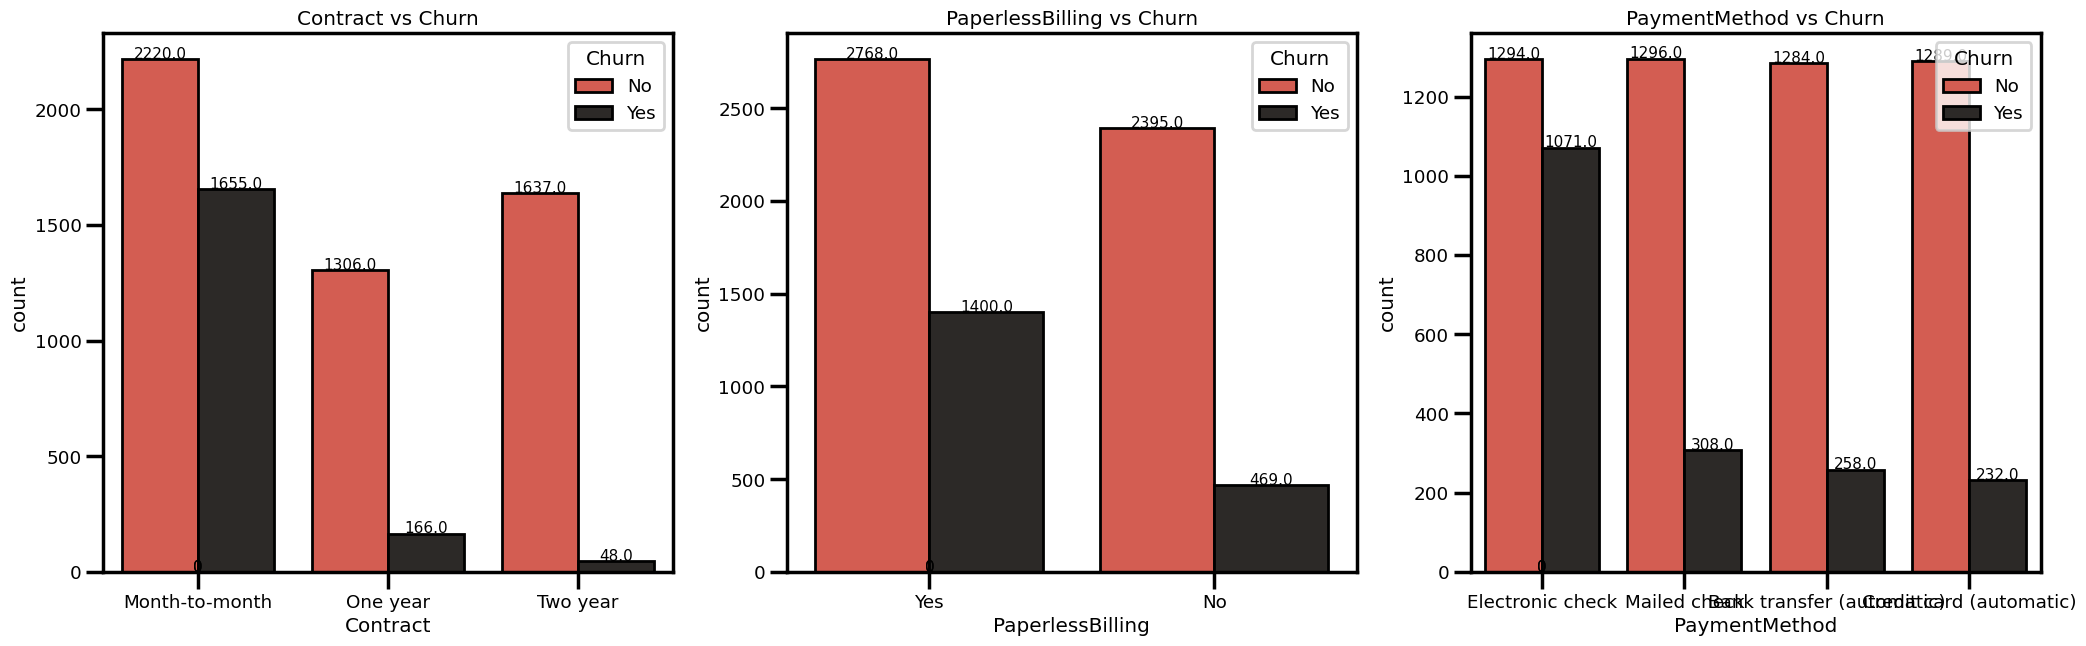

In [91]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- Customer churning for a **Month-to-Month** based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
- **PaperlessBilling** displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
- Customers clearly resented the **Electronic check PaymentMethod**. Out of the 2365 number of bills paid using **Electronic check**, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop **Electronic check** method or make it hassle-free and user-friendly.

# Analyze factors related to customer churn

In [92]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

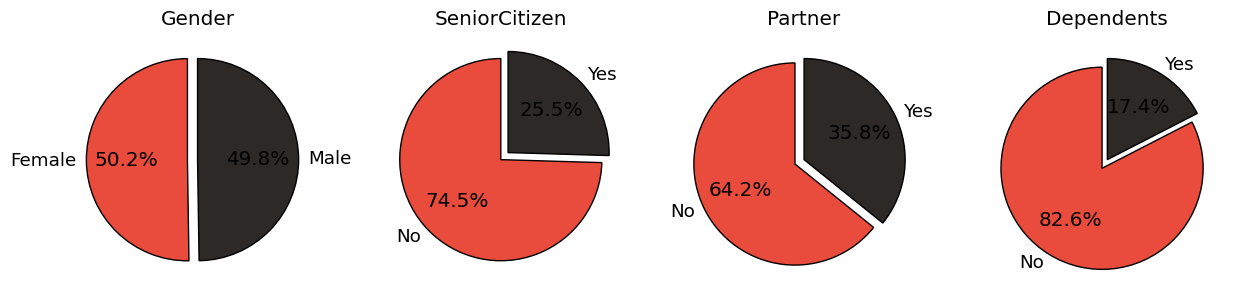

In [93]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services
- Customers living alone have cutoff the services. From **Partners** & **Dependents** data, average of **73.4%** of customers churned out were living alone.

In [94]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

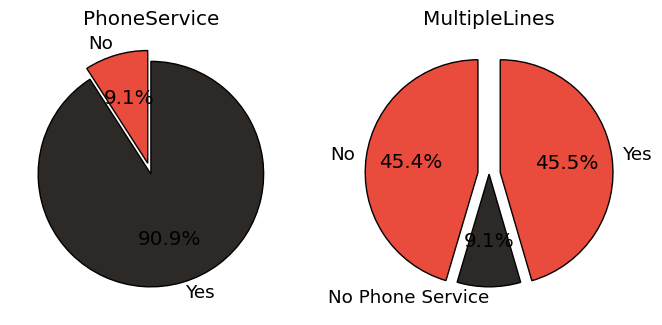

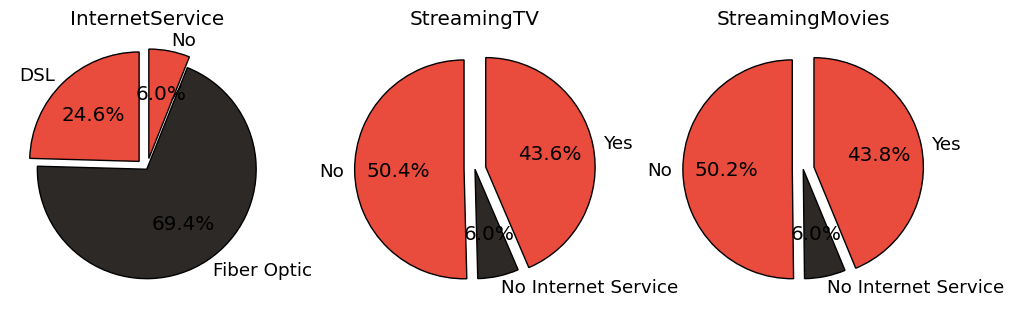

In [95]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

- Despite providing PhoneService, a high percentage of customers have switched!
- Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
- Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!

For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

In [96]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes


<ipython-input-97-54c877e630c6>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)
<ipython-input-97-54c877e630c6>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,2)
<ipython-input-97-54c877e630c6>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,3)


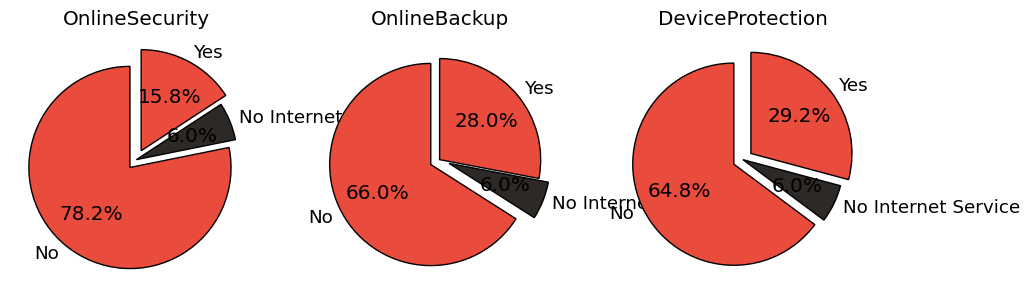

In [97]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');



The pie chart above emphasizes the importance of providing customers with OnlineSecurity, OnlineBackup, DeviceProtection because most customers will leave without these features.

In [98]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100,
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100]
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

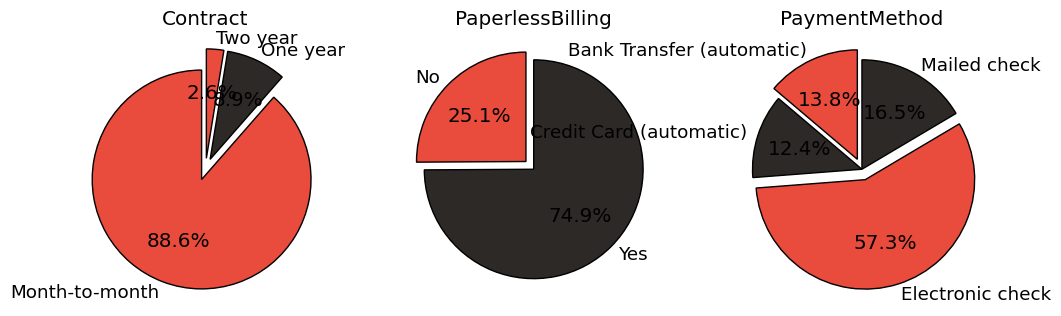

In [99]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- **Month-to-Month** Contract duration has the dominating share when it comes churning with a massive 88.6% customers!
- **PaperlessBilling** does not seemed to be appreciated by the customers!
- **Electronic check** definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!

# Numerical Features

<ipython-input-100-9321107cf963>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
<ipython-input-100-9321107cf963>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],


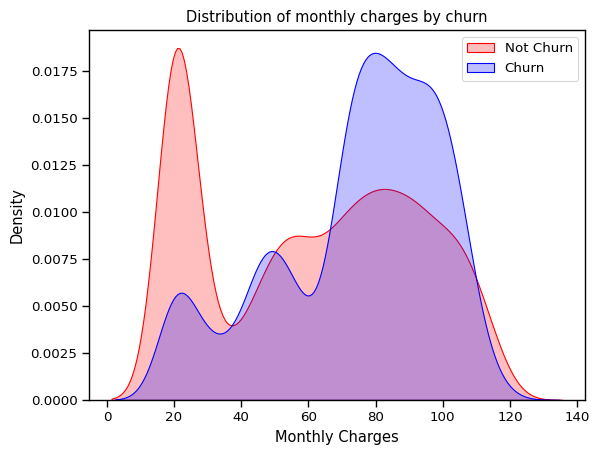

In [100]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

- Customers with higher Monthly Charges are also more likely to churn

In [105]:
import plotly.express as px

col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df1[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features: ', categorical_features)
print('Numerical Features: ', numerical_features)

for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            fig = px.scatter(df1, x=numerical_features[i], y=numerical_features[j], color='Churn',
                             color_discrete_map={'No Churn': 'blue', 'Churn': 'red'})
            fig.show()

Categorical Features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Features:  ['tenure', 'MonthlyCharges', 'TotalCharges']


- For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values.For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.
-For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!
-
Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.

#Feature Engineering

In [109]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,1,2,0.115423,0.383520,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,1,0,3,0.385075,0.224384,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,1,3,0.354229,0.023893,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,0,0,1,0,0,0.239303,0.214275,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,1,2,0.521891,0.141522,1


<Axes: >

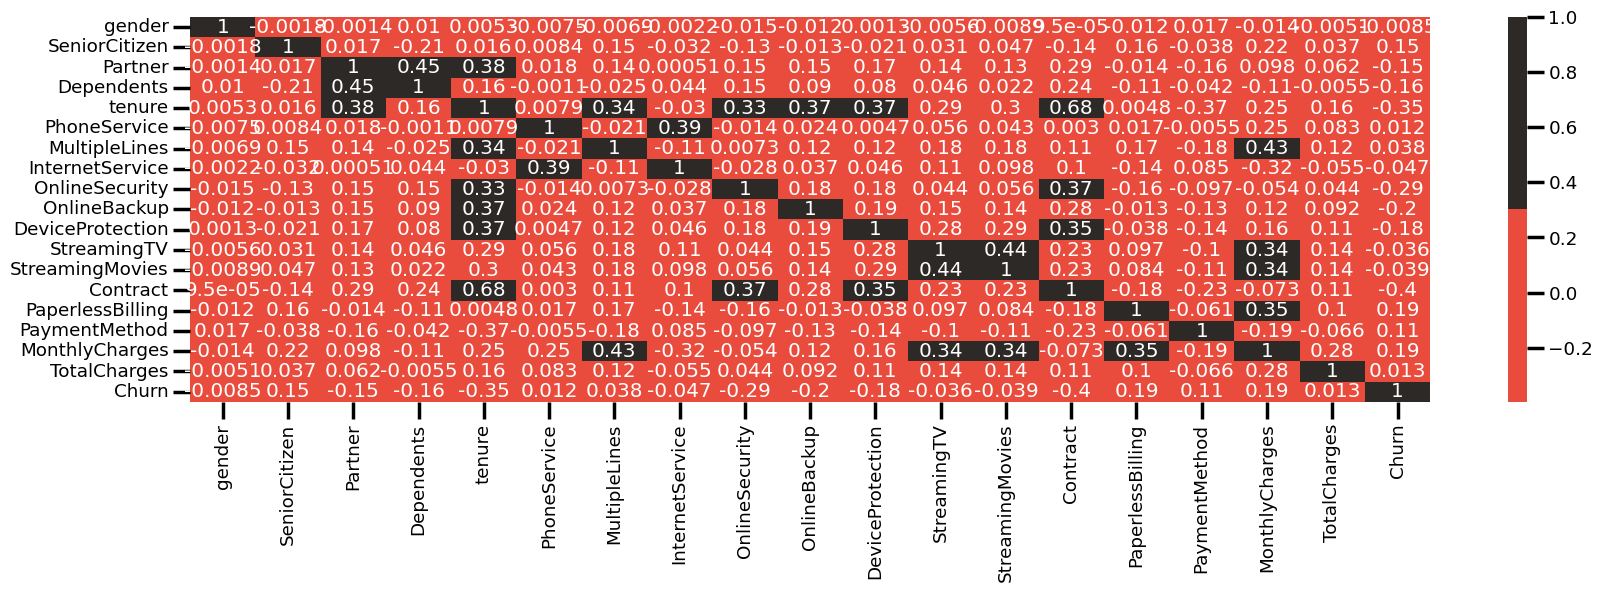

In [110]:
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(),cmap=colors,annot=True)

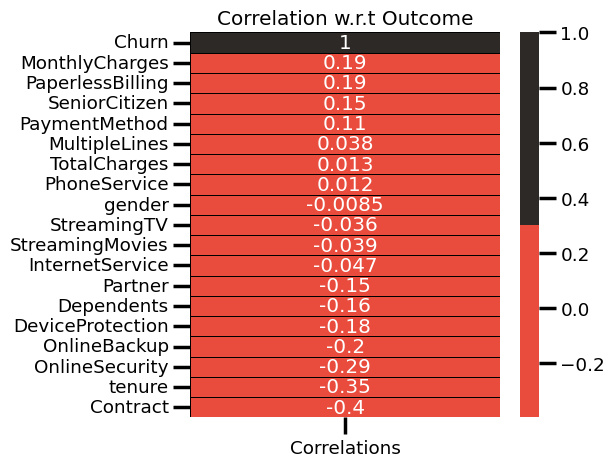

In [114]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

Chi-Squared Test

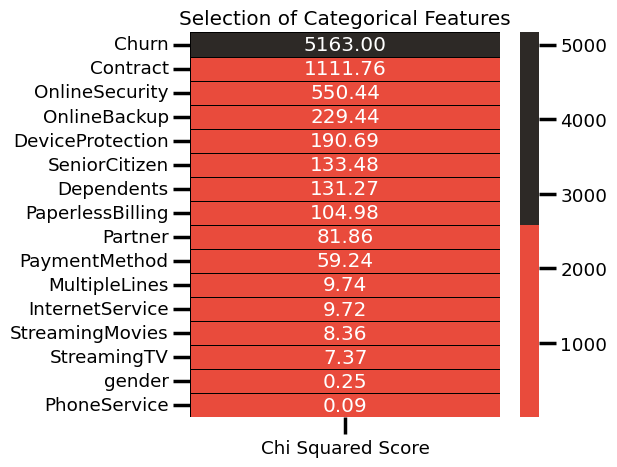

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

**PhoneSercive, gender, StreamingTV, StreamingMovies,MultipleLines.InternetService** display a very low relation with **Churn**

In [117]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,1,2,0.115423,0.383520,0
1,0,0,0,0.464789,2,0,2,1,0,3,0.385075,0.224384,0
2,0,0,0,0.014085,2,2,0,0,1,3,0.354229,0.023893,1
3,0,0,0,0.619718,2,0,2,1,0,0,0.239303,0.214275,0
4,0,0,0,0.014085,0,0,0,0,1,2,0.521891,0.141522,1


Imbalance Data using SMOTE  

In [127]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [130]:
over = SMOTE(sampling_strategy=1)

f1 = df1.iloc[:, :12].values
t1 = df1.iloc[:, 12].values

f1, t1 = over.fit_resample(f1, t1)

print(Counter(t1))

Counter({0: 5163, 1: 5163})


Modeling

In [144]:
x_train,x_test,y_train,y_test = train_test_split(f1,t1,test_size=0.2,random_state=0)


In [145]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [152]:
model_rfc = rfc.fit(x_train,y_train)
model_lr = lr.fit(x_train,y_train)
model_knn = knn.fit(x_train,y_train)
model_xgb = classifier_xgb.fit(x_train,y_train)

## RandomForest

In [153]:
y_pred_test_rfc = model_rfc.predict(x_test)
y_pred_train_rfc = model_rfc.predict(x_train)

Metrics for test set


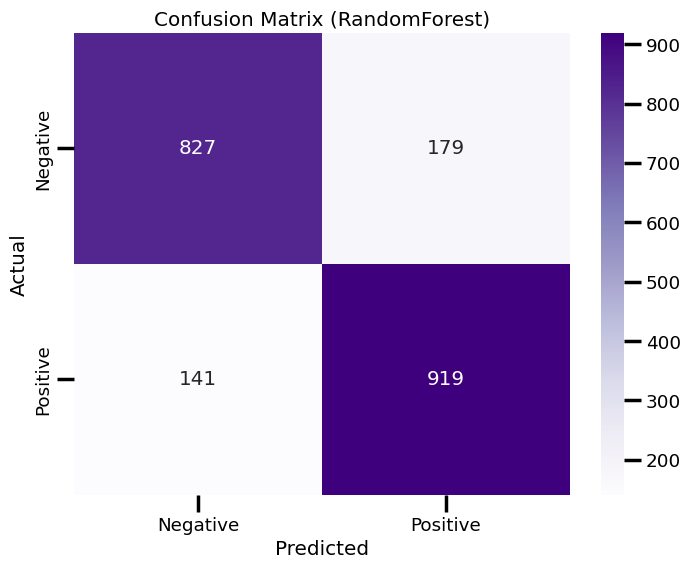

Classification Report RandomForestClassifier():
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1006
           1       0.84      0.87      0.85      1060

    accuracy                           0.85      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.85      0.84      2066

Accuracy Score: for RandomForestClassifier() 
 0.8451113262342691


In [154]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Metrics for test set")

result_cm = confusion_matrix(y_test,y_pred_test_rfc)
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(result_cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RandomForest)')
plt.show()

# Classification Report
result_rp = classification_report(y_test,y_pred_test_rfc)
print(f'Classification Report {model_rfc}:\n',result_rp)

# Accuracy score
acc_score_rfc = accuracy_score(y_test,y_pred_test_rfc)
print(f"Accuracy Score: for {model_rfc} \n", acc_score_rfc)

In [164]:
auc_rfc = np.round(roc_auc_score(y_test,y_pred_test_rfc),3)
auc_rfc

0.845

## Logistic Regresion

In [155]:
y_pred_test_lr = model_lr.predict(x_test)
y_pred_train_lr = model_lr.predict(x_train)

Metrics for test set


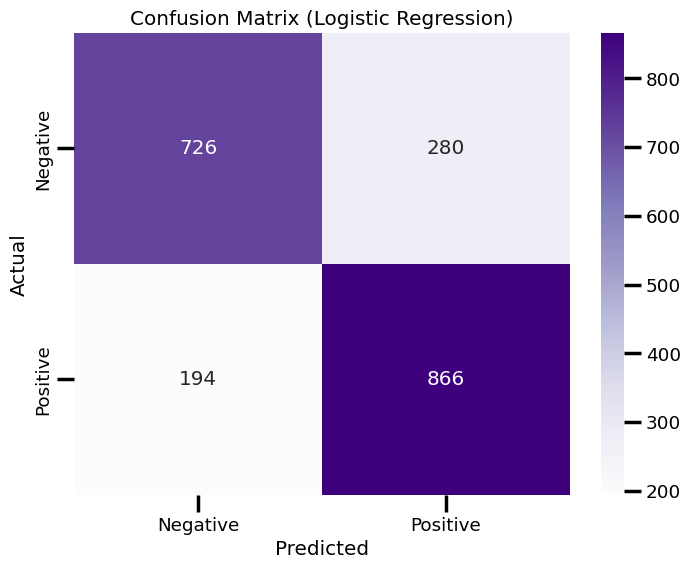

Classification Report LogisticRegression(solver='liblinear'):
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      1006
           1       0.76      0.82      0.79      1060

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Accuracy Score: for LogisticRegression(solver='liblinear') 
 0.7705711519845111


In [156]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Metrics for test set")

result_cm = confusion_matrix(y_test,y_pred_test_lr)
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(result_cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Classification Report
result_rp = classification_report(y_test,y_pred_test_lr)
print(f'Classification Report {model_lr}:\n',result_rp)

# Accuracy score
acc_score_rfc = accuracy_score(y_test,y_pred_test_lr)
print(f"Accuracy Score: for {model_lr} \n", acc_score_rfc)

In [162]:
auc_lr = np.round(roc_auc_score(y_test,y_pred_test_lr),3)
auc_lr

0.769

## XGboost Classifier

In [157]:
y_pred_test_xgb = classifier_xgb.predict(x_test)
y_pred_train_xgb = classifier_xgb.predict(x_train)

Metrics for test set


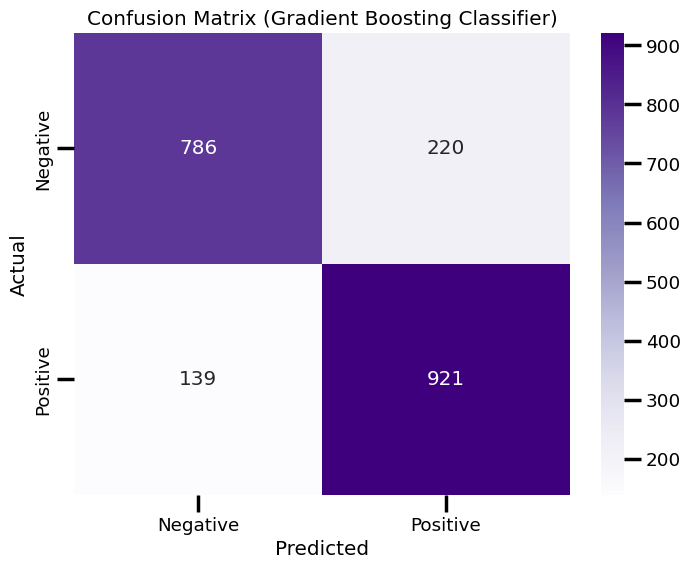

Classification Report XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1006
           1       0.81      0.87      0.84      1060

    accuracy                           0.83      2066
   

In [159]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Metrics for test set")

result_cm = confusion_matrix(y_test,y_pred_test_xgb)
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(result_cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()

# Classification Report
result_rp = classification_report(y_test,y_pred_test_xgb)
print(f'Classification Report {model_xgb}:\n',result_rp)

# Accuracy score
acc_score_gbc = accuracy_score(y_test,y_pred_test_xgb)
print(f"Accuracy Score: for {model_xgb} \n", acc_score_gbc)

In [165]:
auc_xgb = np.round(roc_auc_score(y_test,y_pred_test_xgb),3)
auc_xgb

0.825

## KNN

In [160]:
y_pred_test_knn = model_knn.predict(x_test)
y_pred_train_knn = model_knn.predict(x_train)

Metrics for test set


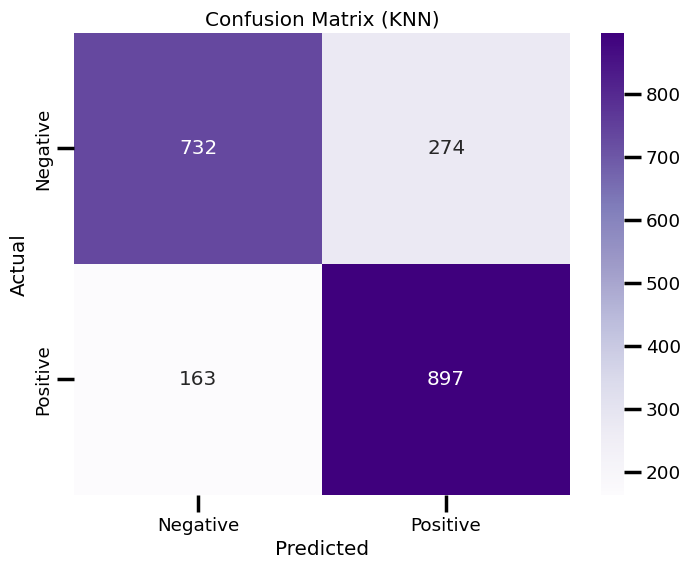

Classification Report KNeighborsClassifier():
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      1006
           1       0.77      0.85      0.80      1060

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Accuracy Score: for KNeighborsClassifier() 
 0.7884801548886737


In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Metrics for test set")

result_cm = confusion_matrix(y_test,y_pred_test_knn)
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(result_cm, annot=True, fmt="d", cmap="Purples", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()

# Classification Report
result_rp = classification_report(y_test,y_pred_test_knn)
print(f'Classification Report {model_knn}:\n',result_rp)

# Accuracy score
acc_score_knn = accuracy_score(y_test,y_pred_test_knn)
print(f"Accuracy Score: for {model_knn} \n", acc_score_knn)

In [167]:
auc_knn = np.round(roc_auc_score(y_test,y_pred_test_knn),3)
auc_knn

0.787

Text(0.5, 1.0, 'Area Under Curve')

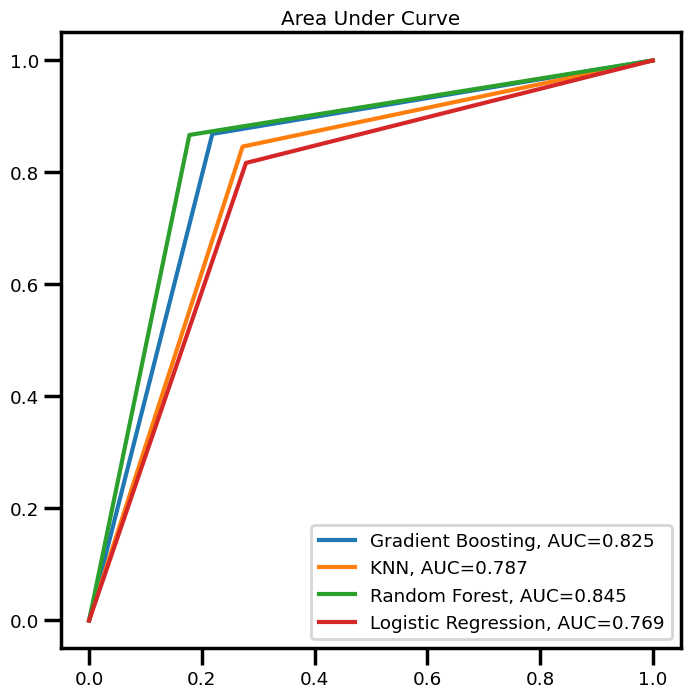

In [169]:
from sklearn import metrics

plt.figure(figsize=(8,8))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_xgb)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc_xgb))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_knn)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc_knn))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_rfc)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rfc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test_lr)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc_lr))

plt.legend()
plt.title("Area Under Curve")

# Reducing Customer Churn & Revenue Inrease

- 3 types of customers should be targeted : **SeniorCitizen**, Living with a **Partner**, living all alone!
- In order to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the **tenure** of 1st 6 months, it needs to focus extensively on **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** as this period is the most critical and uncertain for the customers
- **StreamingTV** and **StreamingMovies** need to be made affordable as well as reducing it's churn **tenure**. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free **PaymentMethod**.
- It needs to put an end to the **Electronic check** for payment purposes due to it's high churn and focus entirely on **Bank Transfer (automatic)** & **Credit Card (automatic)**